# Versión 1

Las variables de decisión se plantean según la planta $i$ y el tipo de producto ($x$, $y$ o $z$):

$min$
${30x_1 + 29x_2 + 32x_3 + 28x_4 + 29x_5 + 45y_1 + 41y_2 + 46y_3 + 42y_4 + 43y_5 + 38z_1 + 35z_2 + 40z_3}$

sujeto a

$\sum_{i=1}^5 x_i = 1400$

$\sum_{i=1}^5 y_i = 1000$

$\sum_{i=1}^5 z_i = 600$

$x_1 + y_1 + z_1 \leq 400$

$x_2 + y_2 + z_2 \leq 600$

$x_3 + y_3 + z_3 \leq 400$

$x_4 + y_4 \leq 600$

$x_5 + y_5 \leq 1000$

$x_1, x_2, x_3, x_4, x_5, y_1, y_2, y_3, y_4, y_5, z_1, z_2, z_3 \geq 0$


# Versión 2

Se plantea la tabla de costos para los orígenes (Plantas) y destinos (Centrales). Se identifica el infinito con el número 10000 para simular costos no explícitos que deben ser grandes por la consistencia del problema. Cabe resaltar que el problema está balanceado en 3000, es decir, hay igualdad entre la oferta y la demanda total:

|Origen\Destino|C1|C2|C3|Oferta|
|-|-|-|-|-|
|P1|30|45|38|400
|P2|29|41|35|600
|P3|32|46|40|400
|P4|28|42|10000|600
|P5|29|43|10000|1000
|**Demanda**|1400|1000|600|**3000**|

\
Se dibuja el grafo de necesidades del problema:
\
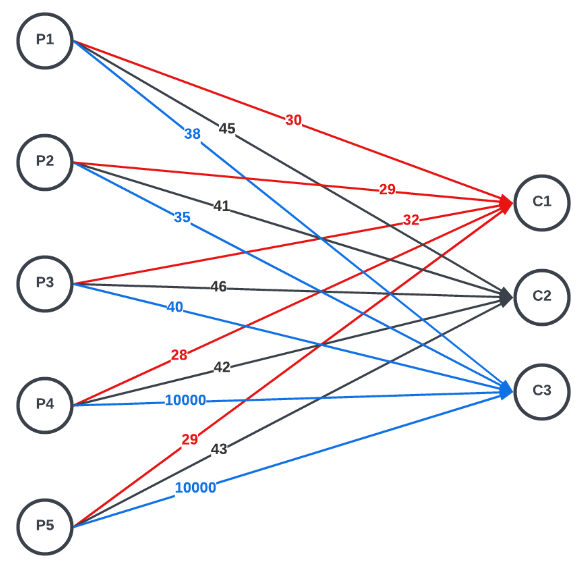

\
El problema de optimización se traduce a reducir el costo de transportar una cantidad $x_{ij}$ desde los orígenes $i$ hasta los destinos $j$:

$min$
${30x_{11} + 29x_{21} + 32x_{31} + 28x_{41} + 29x_{51} + 45x_{12} + 41x_{22} + 46x_{32} + 42x_{42} + 43x_{52} + 38x_{13} + 35x_{23} + 40x_{33} + 10000x_{43} + 10000x_{53}}$

sujeto a

$\sum_{i=1}^5 x_{i1} = 1400$

$\sum_{i=1}^5 x_{i2} = 1000$

$\sum_{i=1}^5 x_{i3} = 600$

$\sum_{j=1}^5 x_{1j} \leq 400$

$\sum_{j=1}^5 x_{2j} \leq 600$

$\sum_{j=1}^5 x_{3j} \leq 400$

$\sum_{j=1}^5 x_{4j} \leq 600$

$\sum_{j=1}^5 x_{5j} \leq 1000$

$x_{ij} \geq 0, \forall i,j$


## Resolución con el algoritmo de transporte

Se resuelve con el algoritmo de transporte empleando Excel. Se muestran las capturas de las tablas a continuación:

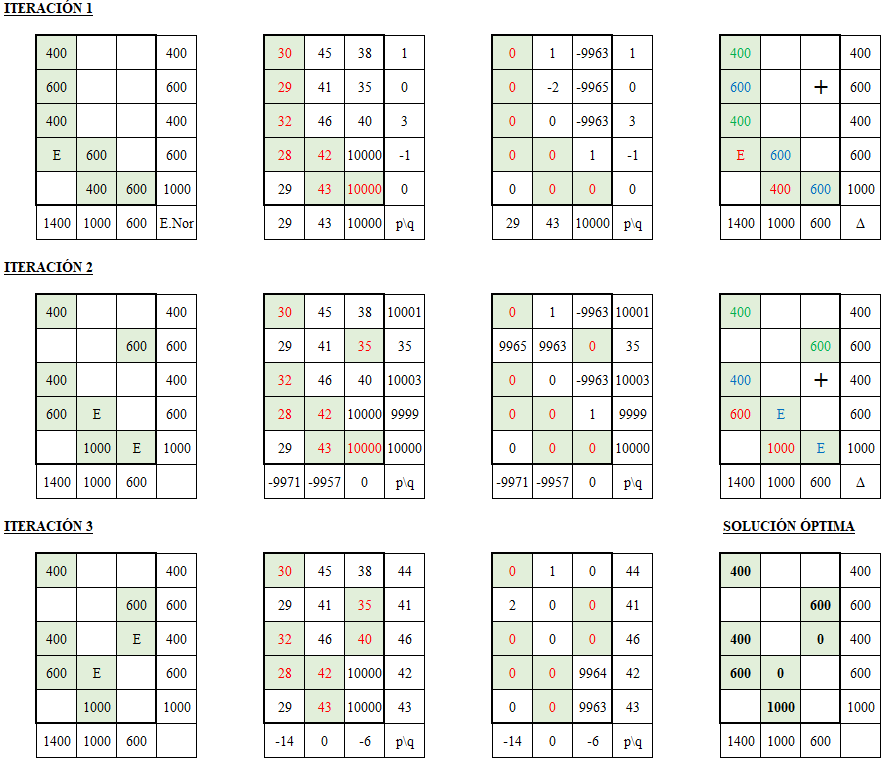

Se puede apreciar el uso del placeholder epsilon ($\epsilon$) cuando el método de la esquina noroeste realiza un salto diagonal. Así mismo, se utiliza el $\epsilon$ para trabajar los cambios de aumento, descenso o conservación con el objetivo de llevar la solución a que sea una SBF al final. Nótese que las tablas que no tienen "p\q" en el último cuadro corresponden a matrices de costos. Las demás son las que se emplean para hacer el simplex.

La solución óptima es, entonces:
\
$\vec{x}^{*T} = \begin{bmatrix}x_{11} & x_{21} & x_{31} & x_{41} & x_{51} & x_{12} & x_{22} & x_{32} & x_{42} & x_{52} & x_{13} & x_{23} & x_{33} & x_{43} & x_{53}\end{bmatrix}$

$\vec{x}^{*T} = \begin{bmatrix} 400 & 0 & 400 & 600 & 0 & 0 & 0 & 0 & 0 & 1000 & 0 & 600 & 0 & 0 & 0\end{bmatrix}$

Con un costo total $f(\vec{x}^{*T}) = \$105 600$

## Resolución con Python

In [5]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (se invierten los signos para maximizar)
c = [30,29,32,28,29,45,41,46,42,43,38,35,40,10000,10000,0,0,0,0,0]
# Coeficientes de las restricciones (matriz A y vector b)
A = [[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
     [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
     [0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0],
     [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
     [0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0],
     [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]]
b = [1400, 1000, 600, 400, 600, 400, 600, 1000]

# Opciones para mostrar el informe del proceso de optimización
options = {'disp': True}

# Llamada a la función de optimización lineal con el método de Revised Simplex / Interior Point y opciones de visualización
res_rs = linprog(c, A_eq=A, b_eq=b, bounds=[(0, None) for _ in range(len(c))], method='revised simplex', options=options)
res_ip = linprog(c, A_eq=A, b_eq=b, bounds=[(0, None) for _ in range(len(c))], method='revised simplex', options=options)

# Mostrar resultados
print("RESULTADOS CON REVISED SIMPLEX:\n")
print("Valor Mínimo de la Función Objetivo:", res_rs.fun)
print("Argumentos Óptimos:", res_rs.x)
print("========================================================\n")
print("RESULTADOS CON INTERIOR POINT:\n")
print("Valor Mínimo de la Función Objetivo:", res_ip.fun)
print("Argumentos Óptimos:", res_ip.x)

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         NA                  1822.086715829      0.0                 
1     1         NA                  1536.229149574      12000.0             
1     2         NA                  1232.882800594      29400.0             
1     3         NA                  1166.190378969      42200.0             
1     4         NA                  1166.190378969      42200.0             
1     5         NA                  848.5281374239      59400.0             
1     6         NA                  721.1102550928      67400.0             
1     7         NA                  600.0               83800.0             
1     8         NA                  600.0               83800.0             
1     9         NA                  200.0               98200.0             
1     10        NA                  200.0               98200.0             
1     11        NA                  0.0                 105600.0            


<ipython-input-5-906d03fd7632>:20: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_rs = linprog(c, A_eq=A, b_eq=b, bounds=[(0, None) for _ in range(len(c))], method='revised simplex', options=options)
<ipython-input-5-906d03fd7632>:21: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_ip = linprog(c, A_eq=A, b_eq=b, bounds=[(0, None) for _ in range(len(c))], method='revised simplex', options=options)


# Preguntas
**Literal d**

Nótese que como hay variables básicas iguales a cero en esta solución básica factible, se tiene que existen infinitas soluciones posibles para el problema de transporte. Esto porque es posible en cualquier momento encontrar otra base e intercambiar variables básicas que valgan cero, con lo cual, no cambiará el costo óptimo de la función objetivo, sino solamente la base.


**Literal f**

Las respuestas en el item d y el item e **NO** son iguales, como claramente se puede apreciar en la consola de Python. La solución del software selecciona otras variables básicas diferentes a la que arrojó el algoritmo de transporte de manera manual. Esto es claro si se comparan los vectores de solución en ambos casos (el manual se escribió más arriba y el de Python está impreso; en ambos casos, el orden de las variables es el mismo).


Sin embargo, esto era esperado como se mencionó anteriormente. La forma de corroborar que efectivamente ambas son soluciones óptimas es que al evaluar la función objetivo y determinar el costo óptimo con ambos vectores, el resultado es el mismo ($\$105600$). Por ende, hemos encontrado dos soluciones óptimas (ambas naturalmente son básicas factibles) para el problema de transporte.